# Carbon Emissions Around the World with a focus on the United States

##### Create your virtual environment, ensure you're in the correct directory, and install the requirements.txt.

In [50]:
# Import modules needed to run project.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read in the Data

In [32]:
df = pd.read_csv('assets/co2_emissions_kt_by_country.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


## Clean the Data

##### Drop unnecessary columns for better readability and overall cleanness.

In [33]:
# ndf= df.drop(columns= 'country_code') ***can accomplish this using code to the left or using inplace= True as shown below. Use inplace if you want to overwright original df.***
df.drop(columns= 'country_code', inplace= True)

##### Rename columns for clarity.

In [34]:
# Rename column/columns using ".rename() method". Must format as dict {x:x}. Use "inplace= True" to save in current variable (df). Could also just create new variable (df2) and not include "inplace= True"
df.rename(columns= {'value': 'Carbon Emissions (in kilotons)', 'country_name': 'Country', 'year': 'Year',}, inplace= True)

##### Manipulate data for easier visualization later.

In [35]:
# Create df focused solely on USA data
usa = df[df['Country'].str.contains('United States')]
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 13209 to 13268
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         60 non-null     object 
 1   Year                            60 non-null     int64  
 2   Carbon Emissions (in kilotons)  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [36]:
# Create df for other prominent countries for future comparisons
gbr = df[df['Country'].str.contains('United Kingdom')]
chn = df[df['Country'].str.contains('China')]
can = df[df['Country'].str.contains('Canada')]
mex = df[df['Country'].str.contains('Mexico')]
rus = df[df['Country'].str.contains('Russian Federation')]

## Visualize the data

##### Plotting the US Two ways

In [44]:
# .plot plotting implementation to visualize a line graph.
# usa.plot.line(x ='Year', rot= 45, y= 'Carbon Emissions (in kilotons)', title = 'United States Carbon Emissions', figsize= (10, 5), grid= True)

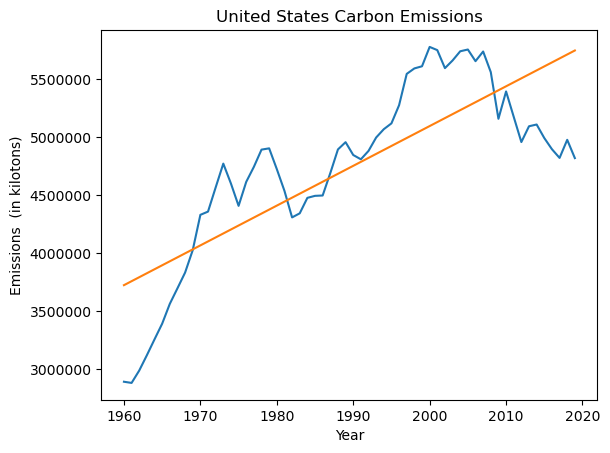

In [53]:
# plt.show implementation to generate same graph differently.
fig, ax = plt.subplots()
ax.plot(usa['Year'], usa['Carbon Emissions (in kilotons)'])
ax.set_xlabel('Year')
ax.set_ylabel('Emissions  (in kilotons)')
ax.set_title("United States Carbon Emissions")
ax.ticklabel_format(style='plain')
z = np.polyfit(usa['Year'], usa['Carbon Emissions (in kilotons)'], 1)
p = np.poly1d(z)
ax.plot(usa['Year'], p(usa['Year']))
plt.show()



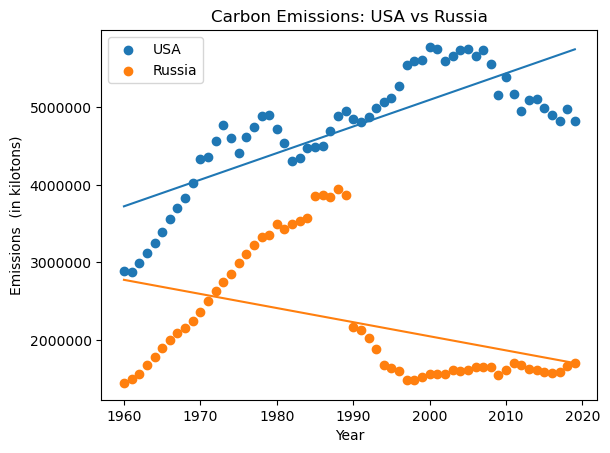

In [54]:
# Create df comparing major USA and Russia with accompanying trends.
fig, ax = plt.subplots()
ax.scatter(usa['Year'], usa['Carbon Emissions (in kilotons)'])
ax.scatter(rus['Year'], rus['Carbon Emissions (in kilotons)'])
ax.set_xlabel('Year')
ax.set_ylabel('Emissions  (in kilotons)')
ax.set_title("Carbon Emissions: USA vs Russia")
ax.ticklabel_format(style='plain')
z = np.polyfit(usa['Year'], usa['Carbon Emissions (in kilotons)'], 1)
zz = np.polyfit(rus['Year'], rus['Carbon Emissions (in kilotons)'], 1)
p = np.poly1d(z)
pp = np.poly1d(zz)
ax.plot(usa['Year'], p(usa['Year']))
ax.plot(rus['Year'], pp(rus['Year']))
ax.legend(['USA', 'Russia'])
plt.show()

In [55]:
# fig, ax= plt.subplots()
# ax.plot(gp_df['year'], gp_df['carbon_emissions'])
# ax.set_xlabel('Year')
# ax.set_ylabel('Emissions (in kilotons)')
# ax.set_title("Emissions: China vs United States")
# ax.ticklabel_format(style='plain')
# plt.show()
